<a href="https://colab.research.google.com/github/iesous-kurios/DS-Unit-1-Sprint-3-Linear-Algebra/blob/master/module4-clustering/GJW_LS_DS_134_Clustering_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K-Means Clustering

# 1) Use the "Breast Cancer Wisconsin (Diagnostic) Data Set" from Kaggle to try and cluster types of cancer cells. 

Here's the original dataset for your reference:

<https://www.kaggle.com/uciml/breast-cancer-wisconsin-data>

## This is a supervised learning dataset

(Because it has **labels** - The "diagnosis" column.)

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA # You don't necessarily have to use this
from sklearn.cluster import KMeans # You don't necessarily have to use this
from sklearn.preprocessing import StandardScaler # You don't necessarily have to use this

df = pd.read_csv("https://raw.githubusercontent.com/ryanleeallred/datasets/master/Cancer_Cells.csv")
print(df.shape)
df.sample(10)

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
354,901011,B,11.140,14.07,71.24,384.6,0.07274,0.06064,0.04505,0.01471,0.1690,0.06083,0.4222,0.8092,3.330,28.840,0.005541,0.033870,0.04505,0.014710,0.03102,0.004831,12.120,15.82,79.62,453.5,0.08864,0.1256,0.1201,0.03922,0.2576,0.07018,NaN
559,925291,B,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,0.2388,2.9040,1.936,16.970,0.008200,0.029820,0.05738,0.012670,0.01488,0.004738,12.480,37.16,82.28,474.2,0.12980,0.2517,0.3630,0.09653,0.2112,0.08732,NaN
452,9111843,B,12.000,28.23,76.77,442.5,0.08437,0.06450,0.04055,0.01945,0.1615,0.06104,0.1912,1.7050,1.516,13.860,0.007334,0.025890,0.02941,0.009166,0.01745,0.004302,13.090,37.88,85.07,523.7,0.12080,0.1856,0.1811,0.07116,0.2447,0.08194,NaN
451,9111805,M,19.590,25.00,127.70,1191.0,0.10320,0.09871,0.16550,0.09063,0.1663,0.05391,0.4674,1.3750,2.916,56.180,0.011900,0.019290,0.04907,0.014990,0.01641,0.001807,21.440,30.96,139.80,1421.0,0.15280,0.1845,0.3977,0.14660,0.2293,0.06091,NaN
551,923780,B,11.130,22.44,71.49,378.4,0.09566,0.08194,0.04824,0.02257,0.2030,0.06552,0.2800,1.4670,1.994,17.850,0.003495,0.030510,0.03445,0.010240,0.02912,0.004723,12.020,28.26,77.80,436.6,0.10870,0.1782,0.1564,0.06413,0.3169,0.08032,NaN
411,905520,B,11.040,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,0.1714,0.06340,0.1967,1.3870,1.342,13.540,0.005158,0.009355,0.01056,0.007483,0.01718,0.002198,12.410,26.44,79.93,471.4,0.13690,0.1482,0.1067,0.07431,0.2998,0.07881,NaN
114,864496,B,8.726,15.83,55.84,230.9,0.11500,0.08201,0.04132,0.01924,0.1649,0.07633,0.1665,0.5864,1.354,8.966,0.008261,0.022130,0.03259,0.010400,0.01708,0.003806,9.628,19.62,64.48,284.4,0.17240,0.2364,0.2456,0.10500,0.2926,0.10170,NaN
22,8511133,M,15.340,14.26,102.50,704.4,0.10730,0.21350,0.20770,0.09756,0.2521,0.07032,0.4388,0.7096,3.384,44.910,0.006789,0.053280,0.06446,0.022520,0.03672,0.004394,18.070,19.08,125.10,980.9,0.13900,0.5954,0.6305,0.23930,0.4667,0.09946,NaN
544,922297,B,13.870,20.70,89.77,584.8,0.09578,0.10180,0.03688,0.02369,0.1620,0.06688,0.2720,1.0470,2.076,23.120,0.006298,0.021720,0.02615,0.009061,0.01490,0.003599,15.050,24.75,99.17,688.6,0.12640,0.2037,0.1377,0.06845,0.2249,0.08492,NaN
224,8813129,B,13.270,17.02,84.55,546.4,0.08445,0.04994,0.03554,0.02456,0.1496,0.05674,0.2927,0.8907,2.044,24.680,0.006032,0.011040,0.02259,0.009057,0.01482,0.002496,15.140,23.60,98.84,708.8,0.12760,0.1311,0.1786,0.09678,0.2506,0.07623,NaN


In [0]:
# create new df with only the features I will be using

df = df[['fractal_dimension_worst', 'radius_se', 'diagnosis']].copy()

In [177]:
df.head()

,fractal_dimension_worst,radius_se,diagnosis
0,0.11890,1.0950,M
1,0.08902,0.5435,M
2,0.08758,0.7456,M
3,0.17300,0.4956,M
4,0.07678,0.7572,M


In [0]:
mapper = ['fractal_dimension_worst', 'radius_se', 'diagnosis']
df = df.rename(columns={"fractal_dimension_worst": "x", "radius_se": "y", "diagnosis": "label"})

In [179]:
df.head()

,x,y,label
0,0.11890,1.0950,M
1,0.08902,0.5435,M
2,0.08758,0.7456,M
3,0.17300,0.4956,M
4,0.07678,0.7572,M


In [0]:
df['label'] = df['label'].replace('M', 0)
df['label'] = df['label'].replace('B', 1)

In [184]:
df.sample(5)

,x,y,label
311,0.05695,0.3160,1
497,0.07661,0.1532,1
41,0.09606,0.2366,0
308,0.06192,0.2244,1
324,0.07961,0.2575,1


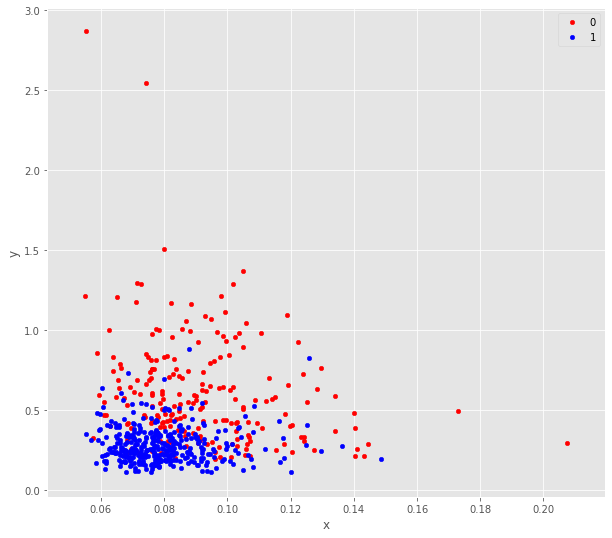

In [185]:
# Create scatterplot with coloring based on assigned labels
colors = {0:'red', 1:'blue'}

fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()                  

## Now it's an unsupervised learning dataset

(Because we've removed the diagnosis label) - Use this version.

In [186]:
df = df.drop('label', axis=1)
df.head()

,x,y
0,0.11890,1.0950
1,0.08902,0.5435
2,0.08758,0.7456
3,0.17300,0.4956
4,0.07678,0.7572


In [187]:
df['y'].min(), df['y'].max()

(0.1115, 2.873)

In [192]:
# Drop labels to prove that this is truly unsupervised learning
points = df.drop('label', axis=1)
points.head()

KeyError: ignored

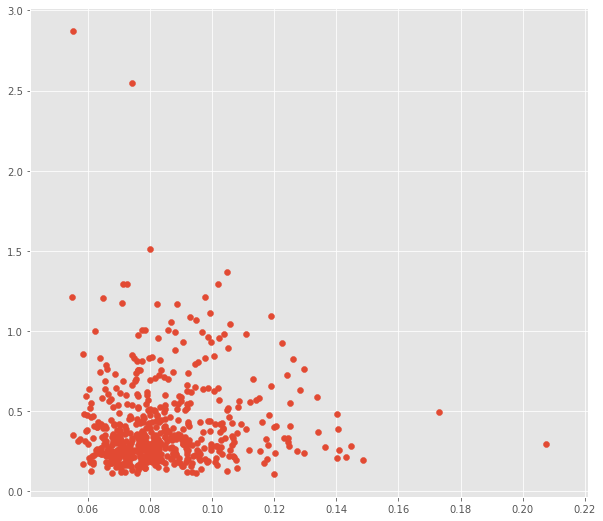

In [188]:
# Scatter plot of our label-less data
plt.scatter(points.x, points.y)
plt.show()

In [189]:
# Calculate the centroid of the entire dataset (only for demonstration purposes)
dataset_centroid_x = points.x.mean()
dataset_centroid_y = points.y.mean()

print(dataset_centroid_x, dataset_centroid_y)

0.08394581722319855 0.4051720562390161


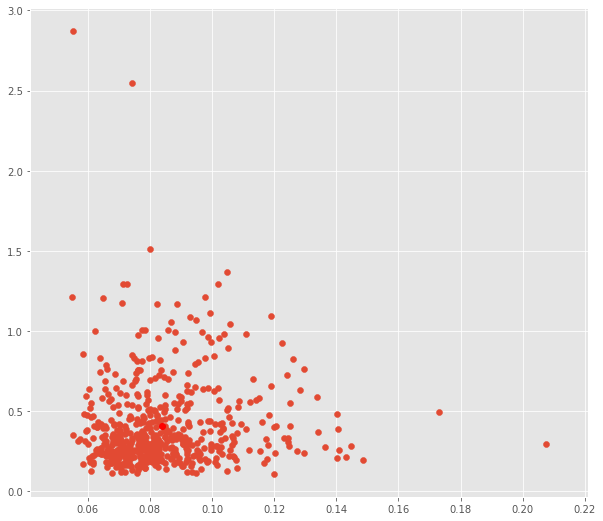

In [190]:
ax.plot(points.x, points.y)
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(dataset_centroid_x, dataset_centroid_y, "or")
plt.show()

In [191]:
centroids = points.sample(3)
centroids.head()

,x,y,clusters
562,0.14090,0.2602,2
70,0.06589,0.7888,0
456,0.07220,0.3135,0


## Let's do it!

- You might want to do some data exploration to see if you can find specific columns that will help you find distinct clusters of cells
- You might want to use the elbow method to decide on the number of clusters to use.


In [0]:
df.corr()

Here is where I do it right, the slow way

In [0]:
points = df[['fractal_dimension_worst', 'radius_se'], 'diagnosis'].copy()

In [126]:
points.head(1)

,fractal_dimension_worst,radius_se
0,0.1189,1.095


In [0]:
mapper = ['fractal_dimension_worst', 'radius_se']
points = points.rename(columns={"fractal_dimension_worst": "x", "radius_se": "y"})

In [135]:
points.head()

,x,y
0,0.11890,1.0950
1,0.08902,0.5435
2,0.08758,0.7456
3,0.17300,0.4956
4,0.07678,0.7572


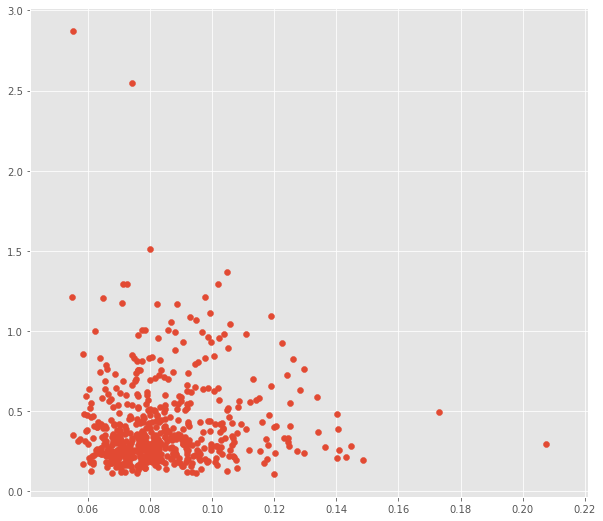

In [136]:
plt.scatter(points.x, points.y)
plt.show()

In [137]:
centroids = points.sample(3)
centroids.head()

,x,y
386,0.08824,0.2666
207,0.06469,0.5858
33,0.11230,0.5558


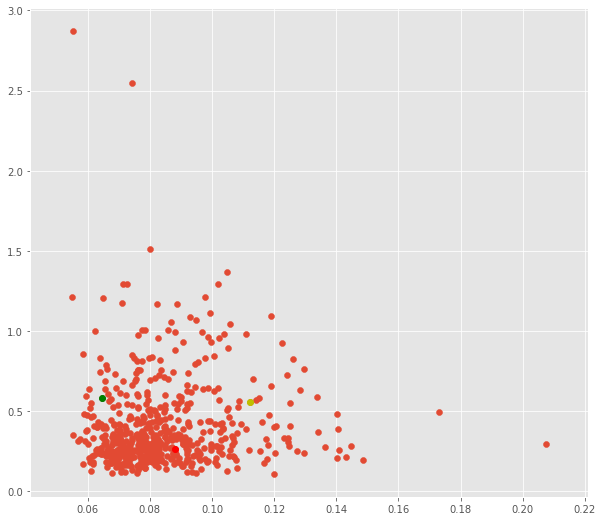

In [138]:
ax = plt.subplot(1,1,1)
ax.scatter(points.x, points.y)
ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "or")
ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "og")
ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "oy")
plt.show()

In [141]:
points.shape

(569, 2)

In [143]:
df['fractal_dimension_worst'].shape

(569,)

In [144]:
df['radius_se'].shape

(569,)

In [142]:
df.shape

(569, 33)

In [0]:
import math
import numpy as np
from scipy.spatial import distance

# Calculate the Nearest Centroid to each data point
def find_nearest_centroid(df, centroids, iteration):
 
  # calculate the distances between each point and each centroid
  distances = distance.cdist(df, centroids, 'euclidean')
  
  # Get nearest centroid to each point based on distance
  nearest_centroids = np.argmin(distances, axis=1)

  se = pd.Series(nearest_centroids)
  df['cluster_'+iteration] = se.values
  
  return df

In [148]:
first_pass = find_nearest_centroid(points.select_dtypes(exclude='int64'), centroids, '1')
first_pass.head()

,x,y,cluster_1
0,0.11890,1.0950,1
1,0.08902,0.5435,2
2,0.08758,0.7456,1
3,0.17300,0.4956,2
4,0.07678,0.7572,1


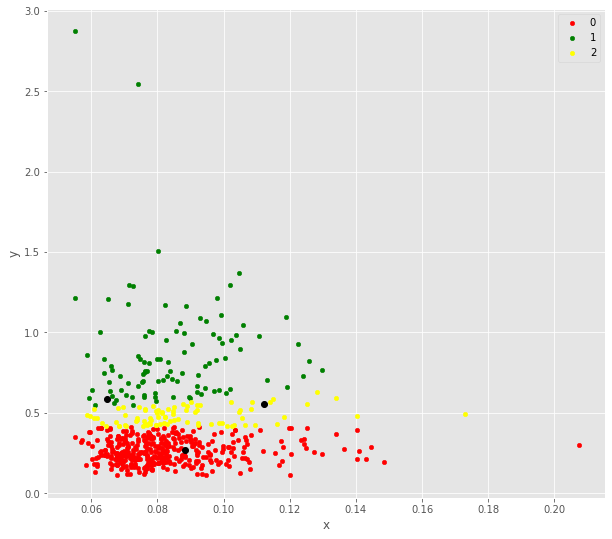

In [149]:
def plot_clusters(df, column_header, centroids):
  colors = {0:'red', 1:'green', 2:'yellow'}
  fig, ax = plt.subplots()
  ax.plot(centroids.iloc[0].x, centroids.iloc[0].y, "ok")
  ax.plot(centroids.iloc[1].x, centroids.iloc[1].y, "ok")
  ax.plot(centroids.iloc[2].x, centroids.iloc[2].y, "ok")
  grouped = df.groupby(column_header)
  for key, group in grouped:
      group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
  plt.show()
  
plot_clusters(first_pass, 'cluster_1', centroids)

In [0]:
def get_centroids(df, column_header):
  new_centroids = df.groupby(column_header).mean()
  return new_centroids

centroids = get_centroids(first_pass, 'cluster_1')

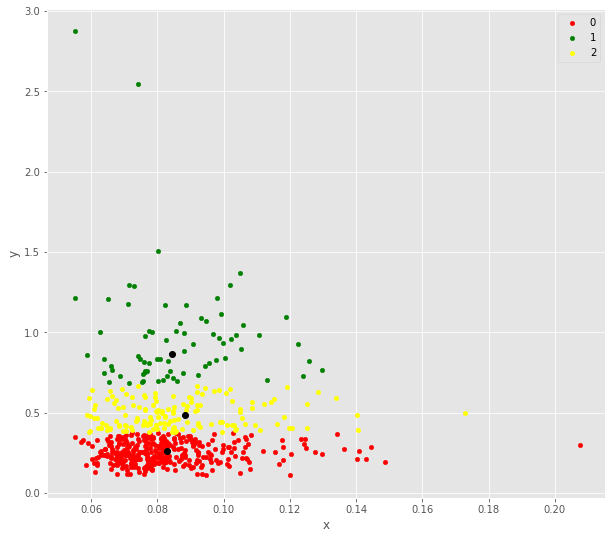

In [151]:
# Calculate New Centroids
centroids = get_centroids(first_pass, 'cluster_1')

# Get Clusters for New Centroids
second_pass = find_nearest_centroid(first_pass.select_dtypes(exclude='int64'), centroids, '2')

# Plot New Cluster
plot_clusters(second_pass, 'cluster_2', centroids)

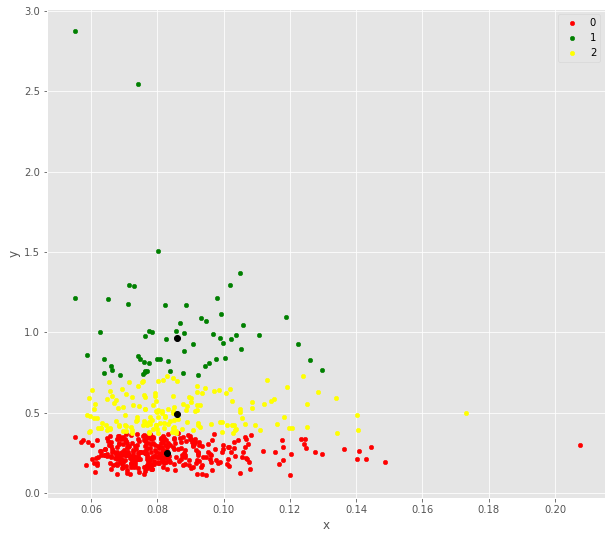

In [152]:
# Calculate New Centroids
centroids = get_centroids(second_pass, 'cluster_2')

# Get Clusters for New Centroids
third_pass = find_nearest_centroid(second_pass.select_dtypes(exclude='int64'), centroids, '3')

# Plot New Cluster
plot_clusters(third_pass, 'cluster_3', centroids)

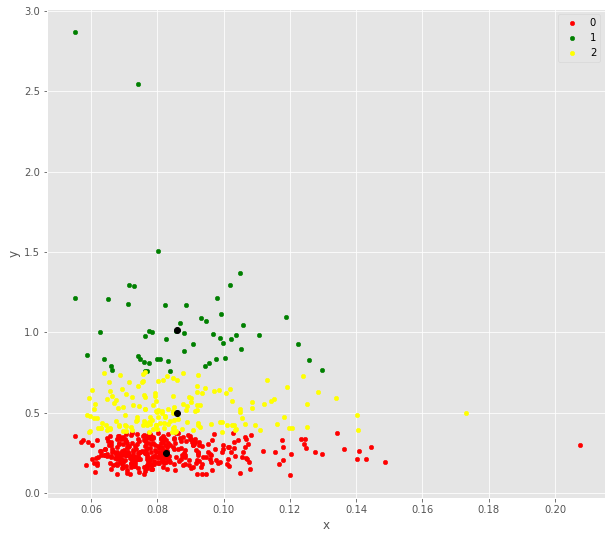

In [153]:
# Calculate New Centroids
centroids = get_centroids(third_pass, 'cluster_3')

# Get Clusters for New Centroids
fourth_pass = find_nearest_centroid(third_pass.select_dtypes(exclude='int64'), centroids, '4')

# Plot New Cluster
plot_clusters(fourth_pass, 'cluster_4', centroids)

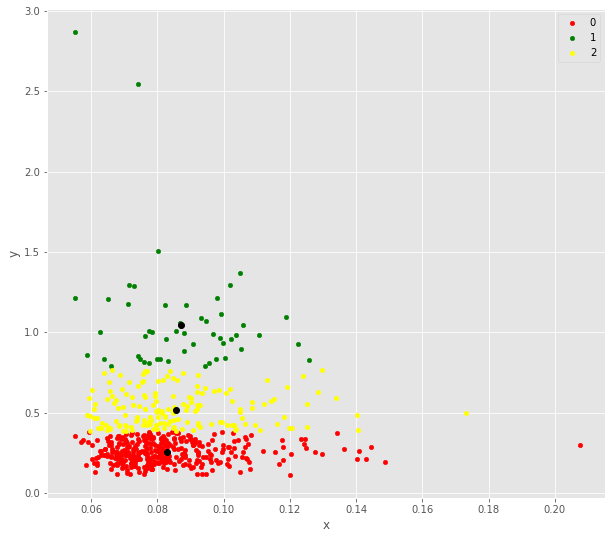

In [154]:
# Calculate New Centroids
centroids = get_centroids(fourth_pass, 'cluster_4')

# Get Clusters for New Centroids
fifth_pass = find_nearest_centroid(fourth_pass.select_dtypes(exclude='int64'), centroids, '5')

# Plot New Cluster
plot_clusters(fifth_pass, 'cluster_5', centroids)

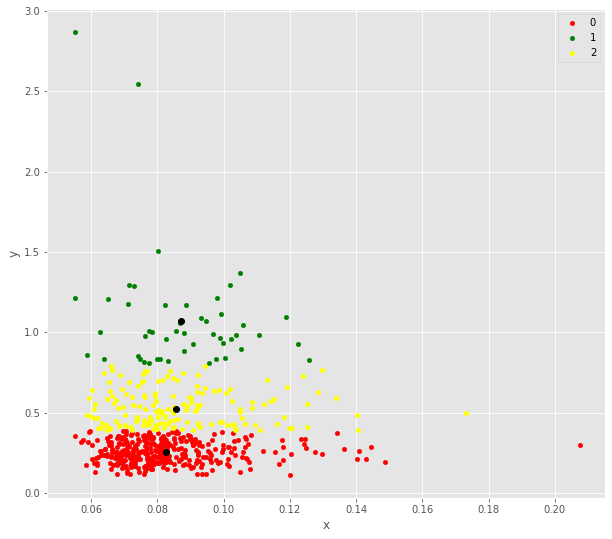

In [155]:
# Calculate New Centroids
centroids = get_centroids(fifth_pass, 'cluster_5')

# Get Clusters for New Centroids
sixth_pass = find_nearest_centroid(fifth_pass.select_dtypes(exclude='int64'), centroids, '6')

# Plot New Cluster
plot_clusters(sixth_pass, 'cluster_6', centroids)

In [158]:
convergence = np.array_equal(fifth_pass['cluster_5'], sixth_pass['cluster_6'])

print("Are we at convergence?? - ", convergence)

Are we at convergence?? -  False


In [157]:
def find_nearest_centroid(df, centroids):
  last_centroids = [np.random.choice([0,1,2])] * df.shape[0]
  df_temp = df.copy()
  i = 0
  
  while True:
    if i>0:
      centroids = get_centroids(df_temp, 'cluster' + str(i-1))

    distances = distance.cdist(df_temp[['x', 'y']], centroids[['x', 'y']])
    nearest_centroids = np.argmin(distances, axis=1)
    
    df_temp['cluster' + str(i)] = nearest_centroids
    
    if (list(nearest_centroids) == list(last_centroids)):
      return df_temp
    else:
      i +=1
      last_centroids = nearest_centroids
      
def get_centroids(df, column_header):
  x = [df.x[df[column_header]==0].mean(), df.x[df[column_header]==1].mean(), df.x[df[column_header]==2].mean()]
  y = [df.y[df[column_header]==0].mean(), df.y[df[column_header]==1].mean(), df.y[df[column_header]==2].mean()]
  data = {'x': x, 'y' : y}
  return pd.DataFrame(data)
  
  
find_nearest_centroid(points, centroids).head()

,x,y,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,cluster9,cluster10,cluster11,cluster12,cluster13,cluster14,cluster15
0,0.11890,1.0950,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0.08902,0.5435,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,0.08758,0.7456,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
3,0.17300,0.4956,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
4,0.07678,0.7572,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [159]:
from sklearn.cluster import KMeans 
kmeans = KMeans(n_clusters=3)
kmeans.fit(X_scaled)
labels = kmeans.labels_

print(labels)

[2 0 1 2 0 2 1 1 2 2 0 2 1 0 2 2 0 1 1 0 1 0 2 0 1 1 2 0 2 1 1 2 1 2 2 1 1
 0 0 1 0 1 2 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 2 0 1 1 0 0 2 0 0 1 2 1
 0 0 0 2 2 0 0 1 2 1 0 0 0 1 1 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 2 1 0 2 1 0
 0 1 0 1 1 0 1 2 0 1 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 0 0 2 1 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 2 1 0 1
 0 0 0 0 0 2 0 0 2 1 0 1 0 2 1 0 1 1 2 1 1 0 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 2 1 0 0 1 0 0 1 0 0 1 0 0 2 0 1 0 0 2 0 0 1 0 2 0 1 1 2 2 2
 2 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 1 1 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 1 0
 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 0 2 2 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1
 1 0 1 1 0 1 1 0 1 2 1 0 1 1 0 0 1 0 1 0 0 0 1 2 0 0 0 0 0 0 2 0 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 0 2 1 1 1 0 1 0 0 0 0 1 1 0 0
 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 2 1 0 2 1 0 0 1 0 1 0 1 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 

In [162]:
# Add our new labels to the dataframe
new_series = pd.Series(labels)
points['clusters'] = new_series.values

points.head(10)

,x,y,clusters
0,0.11890,1.0950,2
1,0.08902,0.5435,0
2,0.08758,0.7456,1
3,0.17300,0.4956,2
4,0.07678,0.7572,0
5,0.12440,0.3345,2
6,0.08368,0.4467,1
7,0.11510,0.5835,1
8,0.10720,0.3063,2
9,0.20750,0.2976,2


In [161]:
# We might get unlucky with different centroids and have slightly different clusters.
centroids = get_centroids(df, 'clusters')
plot_clusters(df, 'clusters', centroids)

AttributeError: ignored

## Check you work: 

This is something that in a truly unsupervised learning situation **WOULD NOT BE POSSIBLE**. But for educational purposes go back and grab the true diagnosis column (label) from the original dataset. Take your cluster labels and compare them to the original diagnosis column. You can make scatterplots for each to see how they compare or you can calculate a percent accuracy score like: 
\begin{align}
\frac{\text{Num Correct Labels}}{\text{Num Total Observations}}
\end{align}

In [0]:
# Your Code Here

# 2) Perform PCA on your dataset first and *then* use k-means clustering. 

- You need to standardize your data before PCA.
- First try clustering just on PC1 and PC2 so that you can make a scatterplot of your clustering.
- Then use use a scree plot to decide how many principal components to include in your clustering, and use however many principal components you need in order to retain 90% of the variation of the original dataset



In [0]:
##### Your Code Here #####

## Check your work: 

- Compare your PC1, PC2 clustering scatterplot to the clustering scatterplots you made on the raw data
- Calculate accuracy scores for both the PC1,PC2 Principal component clustering and the 90% of explained variance clustering.

How do your accuracy scores -when preprocessing the data with PCA- compare to the accuracy when simply clustering on the raw data?

# Stretch Goals:

- Study for the Sprint Challenge
- Work on your Data Storytelling Project